In [360]:
import numpy as np
import matplotlib.pyplot as plt

In [361]:
# Constants
hbar = 1.0   # Planck's constant / 2π
m = .1
delta = -2.5E-8
k = 1E-4
kprime_nu = k*np.sqrt(1+2*delta)
kprime_antinu = k*np.sqrt(1-2*delta)
distance = 3E13*5
earth_cutoff = 3E13 / distance

# Solving the TISE for equation (11) in Saarik's paper
# ignoring spherical Bessel nonsense for now
# Should be able to just graph it in 1D to see if I can it to work, then it should be relatively simple to multiply this by
# spherical Bessel stuff with theta and phi dependence to extend to 3D


# delta negative is neutrino, delta positive is anti-neutrino

In [362]:
# define derivative matrices
def first_deriv(N, distance):
    diags0 = np.zeros(N)

    ddr = np.diag(diags0)

    for i in range(0, ddr.shape[0]):
        if i != 0:
            ddr[i,i-1] = -1
        if i != ddr.shape[0]-1:
            ddr[i,i+1] = 1
    
    delta_x = distance / N

    return ddr / (2 * delta_x)



def second_deriv(N, distance):
    diags2 = np.full(N, 2)

    d2dr = np.diag(diags2)

    for i in range(0, d2dr.shape[0]):
        if i != 0:
            d2dr[i,i-1] = -1
        if i != d2dr.shape[0]-1:
            d2dr[i,i+1] = -1
    
    delta_x = distance / N

    return d2dr / (delta_x**2)


In [363]:
# define the potentials, treating it for now as a 1D step function


def potential_nu(N, r, l):

    H = np.zeros((N,N))
    for i in range(0, H.shape[0]):
        #try just a step function
        
        # inside the earth:
        # it's plus delta because -mU = + delta/k^2
        V_eff_in = kprime_nu**2 + 2 * delta * kprime_nu**2 - (l * (l + 1))/(r[i]**2)

        # outside the earth:
        V_eff_out = k**2 * (1  - (l * (l + 1))/(k**2 * r[i]**2))


        # if i < 3:
        #     H[i,i] = 1E20        
        # el
        if i < int(earth_cutoff * N):
            H[i,i] = V_eff_in
            #print("V_eff_in: ", V_eff_in)
        else:
            H[i,i] = V_eff_out
            #print("V_eff_out: ", V_eff_out)
    #print("nu: \n",H)

    return H



def potential_antinu(N, r, l):

    H = np.zeros((N,N))
    for i in range(0, H.shape[0]):
        #try just a step function
        global V_eff_in_neg, V_eff_out_neg
        # inside the earth:
        V_eff_in_neg = kprime_antinu**2 - 2 * delta  * kprime_antinu**2 - (l * (l + 1))/(r[i]**2)

        # outside the earth:
        V_eff_out_neg = k**2 * (1  - (l * (l + 1))/(k**2 * r[i]**2))

        # if i < 3:
        #     H[i,i] = 1E20
        # el
        if i < int(earth_cutoff * N):
            H[i,i] = V_eff_in_neg
            #print("V_eff_in_neg: ", V_eff_in_neg)
        else:
            H[i,i] = V_eff_out_neg
            #print("V_eff_out_neg: ", V_eff_out_neg)
    #print("antinu: \n",H)
    return H

potential_nu(1000, np.linspace(.01, distance, 1000), 10)
potential_antinu(1000, np.linspace(.01, distance, 1000), 1E10)

array([[-1.00000000e+24,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -4.43555000e-03,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.10888000e-03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         5.53770640e-09,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  5.54664439e-09,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  5.55555556e-09]])

In [364]:
# create the equation to be solved
def Hamiltonian_nu(N, r, l):
    H = second_deriv(N, distance) +  (2/r) * first_deriv(N, distance) + potential_nu(N,r, l)
    return H

def Hamiltonian_antinu(N, r, l):
    H = second_deriv(N, distance) + (2/r) *  first_deriv(N, distance) + potential_antinu(N,r, l)
    return H

def normalize(psi):
    norm = np.sqrt(np.sum(np.abs(psi)**2, axis=1))  # Compute the norm of each row
    psi_norm = psi / norm[:, np.newaxis]  # Normalize each row
    return psi_norm


-1099999.99999999
-1099999.99999999
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.

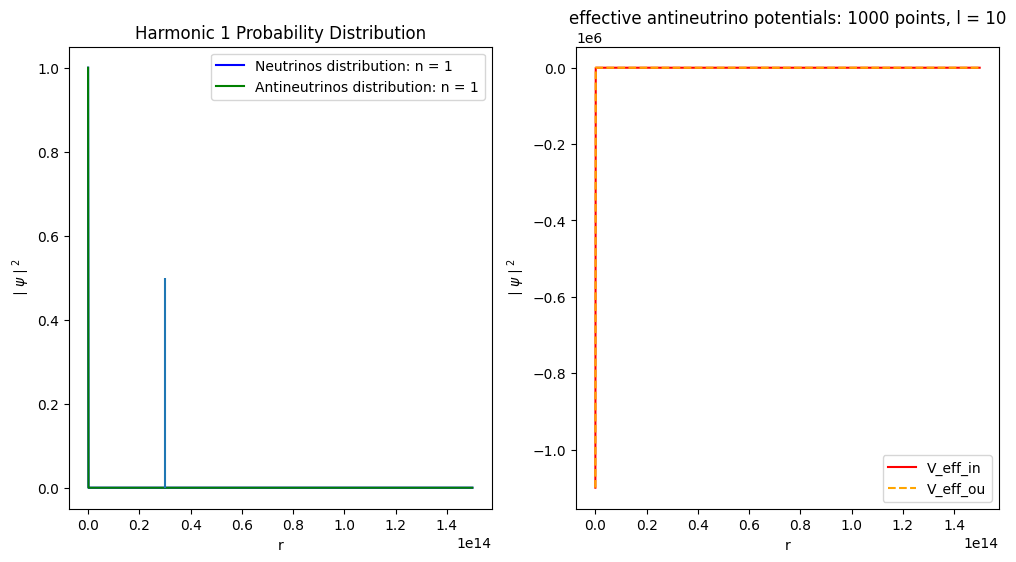

In [365]:
# function to graph the nth harmonic
#try solving equation 25 instead

# fix my 2mU to delta definition - it's wrong (tried fixing it make sure its right)

def harmonic(n, N, l):
    
    global r_values, psi_antinu, psi_nu
    
    r_values = np.linspace(.01, distance, N)
    #might try using eig instead of eigh because the matrices are no longer symmetric
    E_pos, psi_nu = np.linalg.eig(potential_nu(N, r_values, l))
    E_neg, psi_antinu = np.linalg.eig(potential_antinu(N, r_values, l))
    print(E_pos[0])
    print(E_neg[0])

    psi_nu = psi_nu.T
    psi_antinu = psi_antinu.T
    print(psi_nu[0])

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the first two graphs on the first subplot
    ax1.plot(r_values, np.abs(psi_nu[n-1])**2, color = 'blue', label=f'Neutrinos distribution: n = {n}') # graphing numerically
    ax1.plot(r_values, np.abs(psi_antinu[n-1])**2, color = 'green', label=f'Antineutrinos distribution: n = {n}') # graphing numerically

    asymmetry = (np.abs(psi_nu[n-1])**2 - np.abs(psi_antinu[n-1])**2)# / (np.abs(psi_nu[n-1])**2 + np.abs(psi_antinu[n-1])**2)
    print("Asymmetry;", asymmetry)
    

    # Plot the asymmetry on the second subplot
    ax2.plot(r_values, kprime_antinu**2 * (1 - 2 * delta - (l * (l + 1))/(kprime_antinu**2 * r_values**2)), color='red', label='V_eff_in') # graphing numerically
    ax2.plot(r_values, k**2 * (1  - (l * (l + 1))/(k**2 * r_values**2)), color='orange', label='V_eff_ou', linestyle = '--') # graphing numerically
    
    # graph the potential on the same plot
    ax1.vlines(3E13, ymin = 0, ymax=.5)
    #ax2.vlines(3E13, ymin = 0, ymax=1)

    # Set labels and title for the first subplot
    ax1.set_xlabel('r')
    ax1.set_ylabel(r'$\mid\psi\mid^2$')
    ax1.set_yscale('linear')
    ax1.set_xscale('linear')
    ax1.set_title(f'Harmonic {n} Probability Distribution')

    # Set labels and title for the second subplot
    ax2.set_xlabel('r')
    ax2.set_ylabel(r'$\mid\psi\mid^2$')
    ax2.set_yscale('linear')
    ax2.set_xscale('linear')
    ax2.set_title(f'effective antineutrino potentials: {N} points, l = {l}')

    # Display legend
    ax1.legend()
    ax2.legend()

    # Save the figure
    plt.savefig('1D_plots/step_function.png')

    # Show the plot
    plt.show()



# harmonic(1, 4000, l=1E8)
harmonic(1, 1000, l=10)
# harmonic(1, 4000, l=1E12)
# harmonic(1, 5000, l=1E8)
# harmonic(1, 5000, l=1E10)
# harmonic(1, 5000, l=1E12)
# harmonic(1, 6000, l=1E8)
# harmonic(1, 6000, l=1E10)
# harmonic(1, 6000, l=1E12)

In [366]:
# Potentials and Hamiltonian from equation 25


def potential_nu_25(N, r, l):

    H = np.zeros((N,N))
    for i in range(0, H.shape[0]):
        #try just a step function
        
        # inside the earth:
        # it's plus delta because -mU = + delta/k^2
        V_eff_in = (l * (l + 1))/(r[i]**2) + 2 * delta * kprime_nu**2

        # outside the earth:
        V_eff_out = (l * (l + 1))/(r[i]**2)


        
        # if i < 3:
        #     H[i,i] = 0
        # el
        if i < int(earth_cutoff * N):
            H[i,i] = V_eff_in
        else:
            H[i,i] = V_eff_out

    return H

def potential_antinu_25(N, r, l):

    H = np.zeros((N,N))
    for i in range(0, H.shape[0]):
        #try just a step function
        
        # inside the earth:
        V_eff_in_neg = (l * (l + 1))/(r[i]**2) - 2 * delta * kprime_antinu**2

        # outside the earth:
        V_eff_out_neg = (l * (l + 1))/(r[i]**2)
        #print("In, Out neg: ", V_eff_in_neg, V_eff_out_neg)

        # if i < 3:
        #     H[i,i] = 0
        # el
        if i < int(earth_cutoff * N):
            H[i,i] = V_eff_in_neg
        else:
            H[i,i] = V_eff_out_neg

    return H

# create the equation to be solved
def Hamiltonian_nu_25(N, r, l):
    H = - second_deriv(N, distance) + potential_nu_25(N,r, l)
    return H

def Hamiltonian_antinu_25(N, r, l):
    H = - second_deriv(N, distance) + potential_antinu_25(N,r, l)
    return H


C:\Users\natha\AppData\Local\Temp\ipykernel_26188\2180644784.py:39: RuntimeWarning: invalid value encountered in divide
  ax2.plot(r_values, (np.abs(psi_nu[n-1])**2 - np.abs(psi_antinu[n-1])**2)/(np.abs(psi_nu[n-1])**2 + np.abs(psi_antinu[n-1])**2), color='red', label='Asymmetry') # graphing numerically


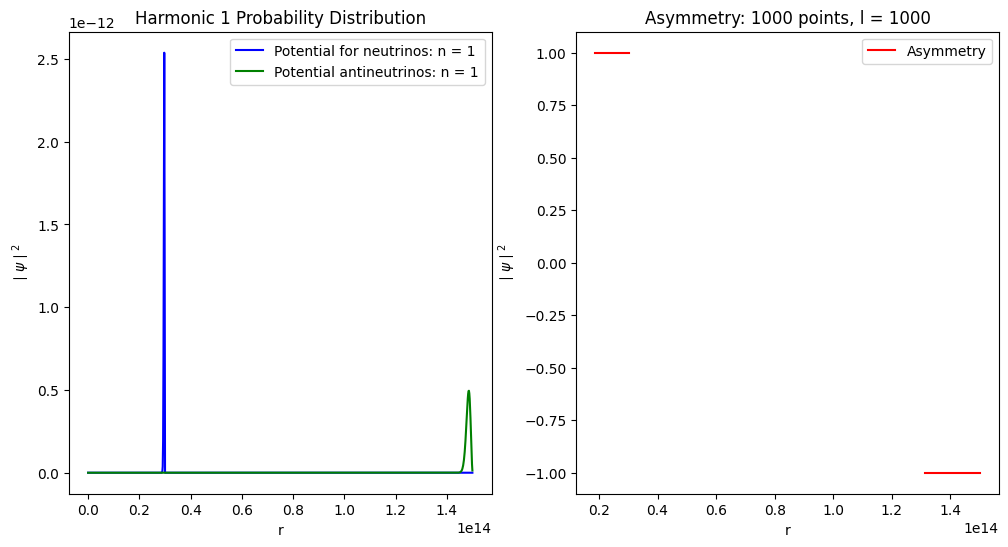

In [381]:
# function to graph the nth harmonic
#try solving equation 25 instead

# fix my 2mU to delta definition - it's wrong (tried fixing it make sure its right)

def harmonic(n, N, l):
    
    global r_values, psi_antinu, psi_nu
    
    r_values = np.linspace(0.001, distance, N)
    E_pos, psi_nu = np.linalg.eigh(Hamiltonian_nu_25(N, r_values, l))
    E_neg, psi_antinu = np.linalg.eigh(Hamiltonian_antinu_25(N, r_values, l))
    psi_nu = psi_nu.T
    psi_antinu = psi_antinu.T

    # Create two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Plot the first two graphs on the first subplot
    # divide by r_values bc equation 25 defines phi = r*psi
    #Calculate the integral of the absolute square of psi/r over all space
    norm_nu = np.trapz(np.abs(psi_nu[n-1] / r_values)**2, r_values)
    norm_antinu = np.trapz(np.abs(psi_antinu[n-1] / r_values)**2, r_values)

    # Divide psi by the square root of this integral to renormalize
    psi_nu_normalized = psi_nu[n-1] / np.sqrt(norm_nu)
    psi_antinu_normalized = psi_antinu[n-1] / np.sqrt(norm_antinu)


    # Now plot the normalized functions
    ax1.plot(r_values, np.abs(psi_nu_normalized / r_values)**2, color = 'blue', label=f'Potential for neutrinos: n = {n}')
    ax1.plot(r_values, np.abs(psi_antinu_normalized / r_values)**2, color = 'green', label=f'Potential antineutrinos: n = {n}')

    # ax1.plot(r_values, np.abs(psi_pos[n-1] / r_values)**2, color = 'blue', label=f'Potential unchanged: n = {n}')
    # ax1.plot(r_values, np.abs(psi_neg[n-1] / r_values)**2, color = 'green', label=f'Potential negative: n = {n}')


    # Plot the asymmetry on the second subplot
    ax2.plot(r_values, (np.abs(psi_nu[n-1])**2 - np.abs(psi_antinu[n-1])**2)/(np.abs(psi_nu[n-1])**2 + np.abs(psi_antinu[n-1])**2), color='red', label='Asymmetry') # graphing numerically
    
    # graph the potential on the same plot
    #ax1.vlines(3E13, ymin = 0, ymax=.001)
    #ax2.vlines(3E13, ymin = 0, ymax=1)

    # Set labels and title for the first subplot
    ax1.set_xlabel('r')
    ax1.set_ylabel(r'$\mid\psi\mid^2$')
    ax1.set_yscale('linear')
    ax1.set_xscale('linear')
    ax1.set_title(f'Harmonic {n} Probability Distribution')

    # Set labels and title for the second subplot
    ax2.set_xlabel('r')
    ax2.set_ylabel(r'$\mid\psi\mid^2$')
    ax2.set_yscale('linear')
    ax2.set_xscale('linear')
    ax2.set_title(f'Asymmetry: {N} points, l = {l}')

    # Display legend
    ax1.legend()
    ax2.legend()

    # Save the figure
    plt.savefig('1D_plots/step_function.png')

    # Show the plot
    plt.show()
    print


# no asymmetry for l < 1E9
# varying based off N for 1E9 < l < 1E10
# exponential decay for l > 1E10 (ish) - bumpy decay for l ~ 1E11, full decay for l > 1E12

# harmonic(1, 4000, l=1E8)
harmonic(1, 1000, l=1000)
# harmonic(1, 4000, l=1E12)
# harmonic(1, 5000, l=1E8)
# harmonic(1, 5000, l=1E10)
# harmonic(1, 5000, l=1E12)
# harmonic(1, 6000, l=1E8)
# harmonic(1, 6000, l=1E10)
# harmonic(1, 6000, l=1E12)

In [368]:
# Now add l dependence
N=3000
l_max = 3

l_E_pos, l_psi_pos = np.linalg.eigh(Hamiltonian_unchanged(N, r_values, l=0))
l_E_neg, l_psi_neg = np.linalg.eigh(Hamiltonian_neg(N, r_values, l=0))
l_psi_pos = l_psi_pos.T
l_psi_neg = l_psi_neg.T
print(l_psi_neg.shape)
print(r_values.shape)


for l in range(1, l_max):
    E_pos, psi_pos = np.linalg.eigh(Hamiltonian_unchanged(N, r_values, l))
    E_neg, psi_neg = np.linalg.eigh(Hamiltonian_neg(N, r_values, l))
    psi_pos = psi_pos.T
    psi_neg = psi_neg.T

    l_psi_pos += psi_pos
    l_psi_neg += psi_neg
    print(l)

l_psi_pos = normalize(l_psi_pos)
l_psi_neg = normalize(l_psi_neg)

ValueError: operands could not be broadcast together with shapes (2000,) (3000,3000) 

ValueError: x and y must have same first dimension, but have shapes (4000,) and (3000,)

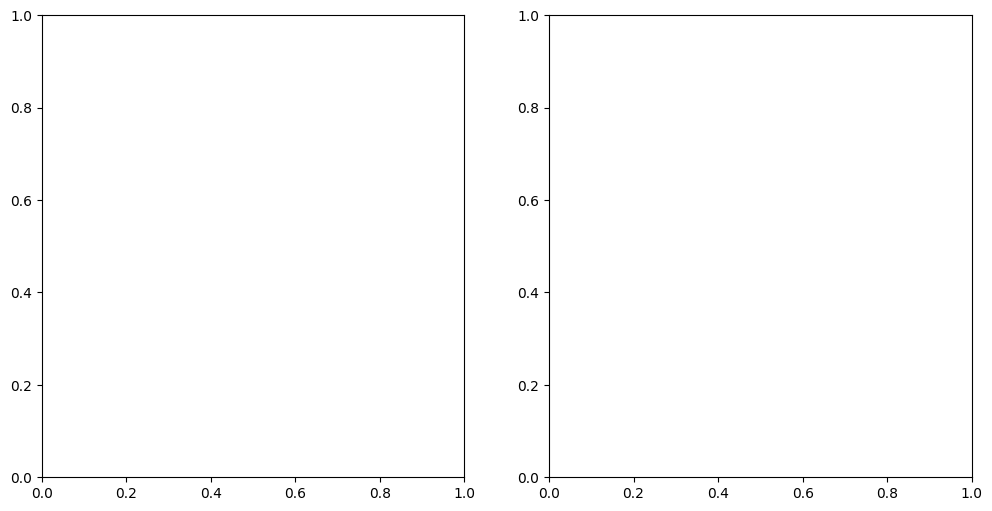

In [ ]:
#graph the normalized wavefunctions

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first two graphs on the first subplot
ax1.plot(r_values, l_psi_pos[0]**2, color='blue', label='Potential unchanged')
ax1.plot(r_values, l_psi_neg[0]**2, color = 'green', label='Potential negative')

# Plot the asymmetry on the second subplot
ax2.plot(r_values, (np.abs(l_psi_pos[0])**2 - np.abs(l_psi_neg[0])**2)/(np.abs(l_psi_pos[0])**2 + np.abs(l_psi_neg[0])**2), color='red', label='Asymmetry') # graphing numerically

# graph the potential on the same plot
ax1.vlines(R, ymin = 0, ymax=.001)
ax2.vlines(R, ymin = 0, ymax=1)

# Set labels and title for the first subplot
ax1.set_xlabel('r')
ax1.set_ylabel(r'$\mid\psi\mid^2$')
ax1.set_yscale('linear')
ax1.set_xscale('linear')
ax1.set_title(f'Normalized Wavefunctions for 0 < l < {l_max}')

# Set labels and title for the second subplot
ax2.set_xlabel('r')
ax2.set_ylabel(r'$\mid\psi\mid^2$')
ax2.set_yscale('linear')
ax2.set_xscale('linear')
ax2.set_title('Asymmetry')

# Display legend
ax1.legend()
ax2.legend()

# Show the plot
plt.show()